# 5.2.1 데이터 추가 처리


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df = pd.read_csv('/content/drive/MyDrive/기말고사 과제/Bike Data 1.csv')
df.shape

(8751, 12)

In [ ]:
df.dtypes

,0
Date,object
Rented Bike Count,int64
Hour,int64
Temperature,float64
Humidity,float64
Wind speed,float64
Visibility,int64
Solar Radiation,float64
Seasons,object
Holiday,object


In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8751 entries, 0 to 8750
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               8751 non-null   object 
 1   Rented Bike Count  8751 non-null   int64  
 2   Hour               8751 non-null   int64  
 3   Temperature        8751 non-null   float64
 4   Humidity           8746 non-null   float64
 5   Wind speed         8751 non-null   float64
 6   Visibility         8751 non-null   int64  
 7   Solar Radiation    8751 non-null   float64
 8   Seasons            8751 non-null   object 
 9   Holiday            8748 non-null   object 
 10  Functioning Day    8751 non-null   object 
 11  Rented Bike B      8751 non-null   float64
dtypes: float64(5), int64(3), object(4)
memory usage: 820.5+ KB


In [ ]:
# 범주형 변수를 cols1에 저장
cols1 = ['Date','Hour','Seasons','Holiday','Functioning Day']
df1 = df[cols1]   # 범주형 변수만 모은 cols1로 구성된 데이터프레임 df1을 생성

# 데이터프레임 df1안의 컬럼명을 순차적으로 value_counts() 구문에 넣어서 결과 출력
for col in df1.columns:
    print ("")
    print ("---- %s ---" % col)
    print (df[col].value_counts(dropna=False, normalize=True))


---- Date ---
Date
13.0    0.553651
12.0    0.052108
2.0     0.032911
3.0     0.032911
4.0     0.032911
5.0     0.032911
6.0     0.032911
8.0     0.032911
10.0    0.032911
11.0    0.032911
0.0     0.032796
1.0     0.032796
7.0     0.032796
9.0     0.032568
Name: proportion, dtype: float64

---- Hour ---
Hour
0.0     0.041710
11.0    0.041710
23.0    0.041710
22.0    0.041710
20.0    0.041710
19.0    0.041710
17.0    0.041710
1.0     0.041710
12.0    0.041710
13.0    0.041710
10.0    0.041710
9.0     0.041710
8.0     0.041710
6.0     0.041710
5.0     0.041710
3.0     0.041710
2.0     0.041710
14.0    0.041595
15.0    0.041595
16.0    0.041595
18.0    0.041595
4.0     0.041595
7.0     0.041595
21.0    0.041367
Name: proportion, dtype: float64

---- Seasons ---
Seasons
2.0    0.252200
1.0    0.251743
0.0    0.249571
3.0    0.246486
Name: proportion, dtype: float64

---- Holiday ---
Holiday
1.0    0.950863
0.0    0.049137
Name: proportion, dtype: float64

---- Functioning Day ---
Function

In [ ]:

import pandas as pd
from dateutil import parser
from sklearn.preprocessing import OrdinalEncoder
# 예제 날짜 데이터
# 날짜 형식 변환 함수
def parse_date(date_str):
    try:
        return parser.parse(date_str, dayfirst=True)
    except ValueError:
        return None
df['Date'] = df['Date'].astype(str)
# 날짜 형식으로 변환
df['Date'] = df['Date'].apply(parse_date)

# 연도 추출
df['Date'] = df['Date'].dt.year

# Ordinal Encoding
encoder = OrdinalEncoder()
df['Date_encoded'] = encoder.fit_transform(df['Date'].values.reshape(-1, 1))

# 년도별로 그룹핑
df.groupby([ 'Date', 'Date_encoded']).size()

,,0
Date,Date_encoded,
2024.0,0.0,8464


In [ ]:

#df['Hour'] = df['Hour'].astype(str)



encoder = OrdinalEncoder()
df['Hour_encoded'] = encoder.fit_transform(df['Hour'].values.reshape(-1, 1))
print(df.groupby(['Hour', 'Hour_encoded']).size())



df['Seasons_encoded'] = encoder.fit_transform(df['Seasons'].values.reshape(-1, 1))
print(df.groupby(['Seasons', 'Seasons_encoded']).size())



df['Functioning Day_encoded'] = encoder.fit_transform(df['Functioning Day'].values.reshape(-1, 1))
print(df.groupby(['Functioning Day', 'Functioning Day_encoded']).size())



df['Holiday_encoded'] = encoder.fit_transform(df['Holiday'].values.reshape(-1, 1))
print(df.groupby(['Holiday', 'Holiday_encoded']).size())

Hour  Hour_encoded
0.0   0.0             365
1.0   1.0             365
2.0   2.0             365
3.0   3.0             365
4.0   4.0             364
5.0   5.0             365
6.0   6.0             365
7.0   7.0             364
8.0   8.0             365
9.0   9.0             365
10.0  10.0            365
11.0  11.0            365
12.0  12.0            365
13.0  13.0            365
14.0  14.0            364
15.0  15.0            364
16.0  16.0            364
17.0  17.0            365
18.0  18.0            364
19.0  19.0            365
20.0  20.0            365
21.0  21.0            362
22.0  22.0            365
23.0  23.0            365
dtype: int64
Seasons  Seasons_encoded
0.0      0.0                2184
1.0      1.0                2203
2.0      2.0                2207
3.0      3.0                2157
dtype: int64
Functioning Day  Functioning Day_encoded
0.0              0.0                         295
1.0              1.0                        8456
dtype: int64
Holiday  Holiday_encod

In [ ]:
df.columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8751 entries, 0 to 8750
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8751 non-null   int64  
 1   Temperature              8751 non-null   float64
 2   Humidity                 8751 non-null   float64
 3   Wind speed               8751 non-null   float64
 4   Visibility               8751 non-null   int64  
 5   Solar Radiation          8751 non-null   float64
 6   Rented Bike B            8751 non-null   float64
 7   Date                     8464 non-null   float64
 8   Hour                     8751 non-null   float64
 9   Seasons                  8751 non-null   float64
 10  Functioning Day          8751 non-null   float64
 11  Holiday                  8751 non-null   float64
 12  Date_encoded             8464 non-null   float64
 13  Hour_encoded             8751 non-null   float64
 14  Seasons_encoded         

In [ ]:
df['Holiday_encoded'].value_counts()

,count
Holiday_encoded,
1.0,8321
0.0,430


In [ ]:
# drop(inplace=True)가 있는 구문은 한 번만 실행할 수 있습니다.
# 두번째 실행하면 이미 특정 변수명이 drop된 상태여서 에러를 발생합니다.
df.drop(['Date','Hour','Seasons','Functioning Day','Holiday'], axis=1, inplace=True)

In [ ]:
# 책에서는 df.columns라는 더 간단한 명령어를 사용했습니다.
list(df.columns)

['Rented Bike Count',
 'Temperature',
 'Humidity',
 'Wind speed',
 'Visibility',
 'Solar Radiation',
 'Rented Bike B',
 'Date_encoded',
 'Hour_encoded',
 'Seasons_encoded',
 'Functioning Day_encoded',
 'Holiday_encoded']

In [ ]:
df.shape


(8751, 12)

In [ ]:
df.isna().any()[lambda x: x]   # null value를 갖고 있는 변수명(컬럼명) 찾기

,0
Date_encoded,True


In [ ]:


df.info()
df.isna().any()[lambda x: x]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8751 entries, 0 to 8750
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8751 non-null   int64  
 1   Temperature              8751 non-null   float64
 2   Humidity                 8751 non-null   float64
 3   Wind speed               8751 non-null   float64
 4   Visibility               8751 non-null   int64  
 5   Solar Radiation          8751 non-null   float64
 6   Rented Bike B            8751 non-null   float64
 7   Date_encoded             8464 non-null   float64
 8   Hour_encoded             8751 non-null   float64
 9   Seasons_encoded          8751 non-null   float64
 10  Functioning Day_encoded  8751 non-null   float64
 11  Holiday_encoded          8751 non-null   float64
dtypes: float64(10), int64(2)
memory usage: 820.5 KB


,0
Date_encoded,True


In [ ]:
# 결측값을 평균값으로 대체
df['Humidity'].fillna(df['Humidity'].mean(), inplace=True)
mode_value = df['Holiday_encoded'].mode()[0]

# 결측값을 최빈값으로 대체
df['Holiday_encoded'].fillna(mode_value, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8751 entries, 0 to 8750
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8751 non-null   int64  
 1   Temperature              8751 non-null   float64
 2   Humidity                 8751 non-null   float64
 3   Wind speed               8751 non-null   float64
 4   Visibility               8751 non-null   int64  
 5   Solar Radiation          8751 non-null   float64
 6   Rented Bike B            8751 non-null   float64
 7   Date_encoded             8464 non-null   float64
 8   Hour_encoded             8751 non-null   float64
 9   Seasons_encoded          8751 non-null   float64
 10  Functioning Day_encoded  8751 non-null   float64
 11  Holiday_encoded          8751 non-null   float64
dtypes: float64(10), int64(2)
memory usage: 820.5 KB


<ipython-input-33-3c80db89e254>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Humidity'].fillna(df['Humidity'].mean(), inplace=True)
<ipython-input-33-3c80db89e254>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

In [ ]:
df.rename(columns={'Date_encoded':'Date','Hour_encoded':'Hour','Seasons_encoded':'Seasons','Functioning Day_encoded':'Functioning Day','Holiday_encoded':'Holiday'}, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8751 entries, 0 to 8750
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rented Bike Count  8751 non-null   int64  
 1   Temperature        8751 non-null   float64
 2   Humidity           8751 non-null   float64
 3   Wind speed         8751 non-null   float64
 4   Visibility         8751 non-null   int64  
 5   Solar Radiation    8751 non-null   float64
 6   Rented Bike B      8751 non-null   float64
 7   Date               8464 non-null   float64
 8   Hour               8751 non-null   float64
 9   Seasons            8751 non-null   float64
 10  Functioning Day    8751 non-null   float64
 11  Holiday            8751 non-null   float64
dtypes: float64(10), int64(2)
memory usage: 820.5 KB


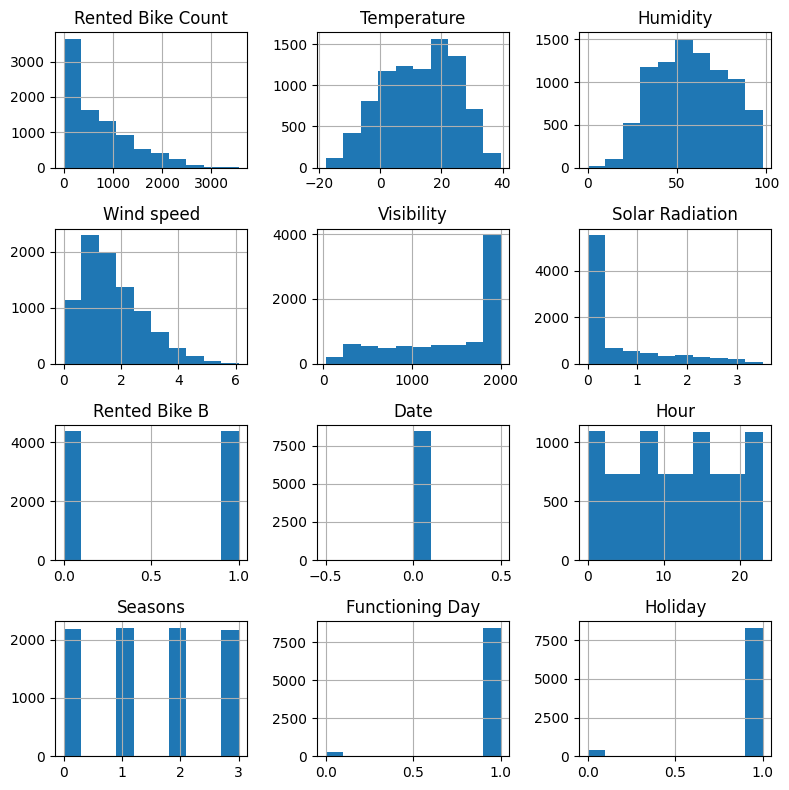

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8751 entries, 0 to 8750
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rented Bike Count  8751 non-null   int64  
 1   Temperature        8751 non-null   float64
 2   Humidity           8751 non-null   float64
 3   Wind speed         8751 non-null   float64
 4   Visibility         8751 non-null   int64  
 5   Solar Radiation    8751 non-null   float64
 6   Rented Bike B      8751 non-null   float64
 7   Date               8464 non-null   float64
 8   Hour               8751 non-null   float64
 9   Seasons            8751 non-null   float64
 10  Functioning Day    8751 non-null   float64
 11  Holiday            8751 non-null   float64
dtypes: float64(10), int64(2)
memory usage: 820.5 KB


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
df.hist(figsize=(8, 8))  # figsize는 그림 크기 설정
plt.tight_layout()  # 레이아웃 조정
plt.show()
df.info()

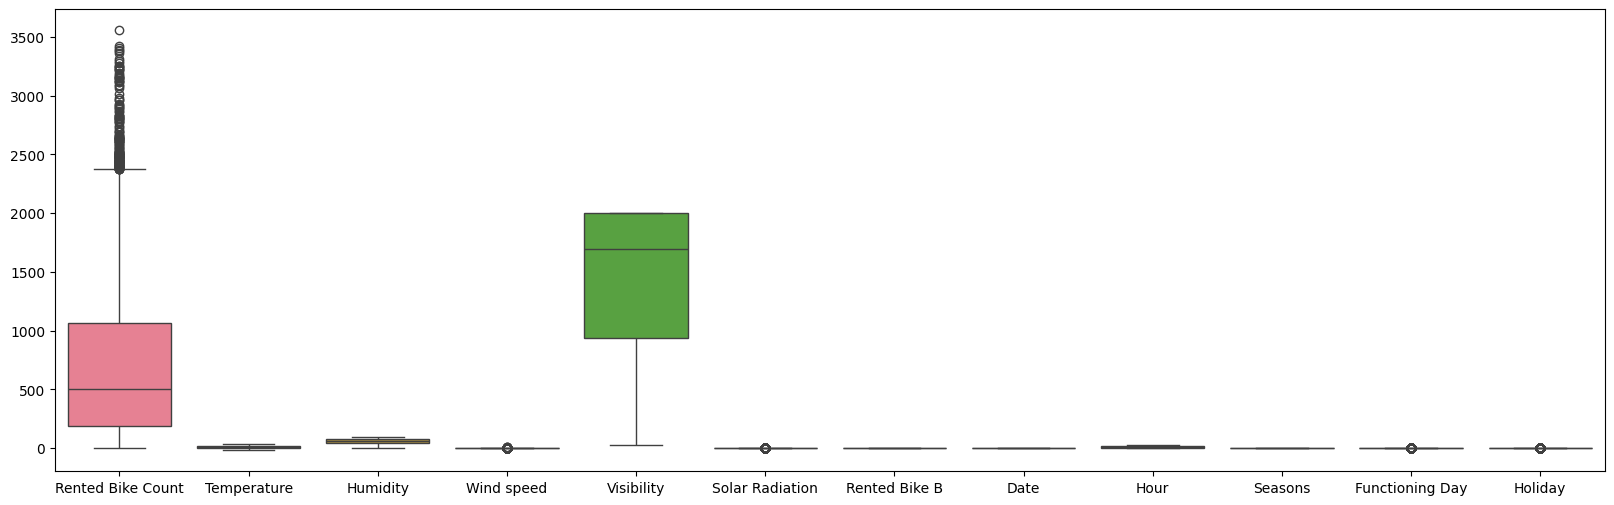

In [ ]:
plt.figure(figsize=(20, 6))  # 그림 크기 설정
sns.boxplot(data=df)
plt.show()

In [ ]:
df.to_csv('/content/drive/MyDrive/기말고사 과제/Bike Data 2.csv', index=False)